In [83]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [84]:
df=pd.read_csv('file:///F:/Drug_details.csv')
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [85]:
df.shape

(200, 6)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [87]:
df.describe()

Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

In [88]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [89]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [90]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [91]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [92]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

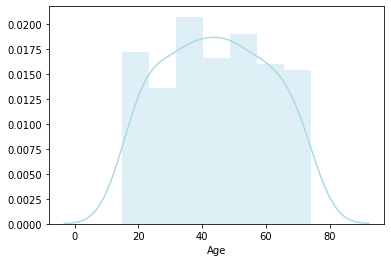

In [93]:
sns.distplot(df['Age'],color='lightblue')

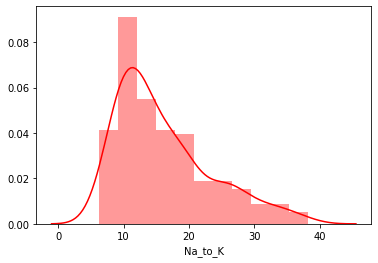

In [94]:
sns.distplot(df['Na_to_K'],color='red')

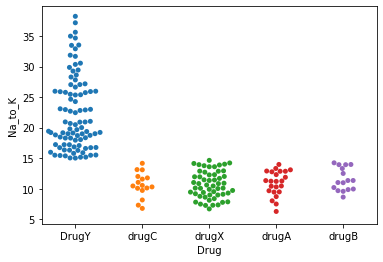

In [95]:
sns.swarmplot(x='Drug',y='Na_to_K',data=df)

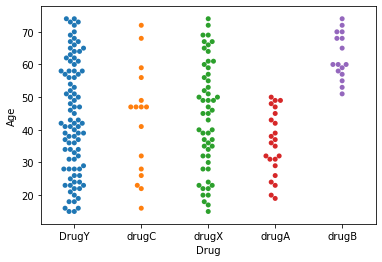

In [96]:
sns.swarmplot(x='Drug',y='Age',data=df)

In [97]:
df['Sex'] = pd.get_dummies(df['Sex'])

In [98]:
df.head()

Age  Sex      BP Cholesterol  Na_to_K   Drug
0   23    1    HIGH        HIGH   25.355  DrugY
1   47    0     LOW        HIGH   13.093  drugC
2   47    0     LOW        HIGH   10.114  drugC
3   28    1  NORMAL        HIGH    7.798  drugX
4   61    1     LOW        HIGH   18.043  DrugY

In [99]:
df['Cholesterol'] = pd.get_dummies(df['Cholesterol'])

In [100]:
df.head()

Age  Sex      BP  Cholesterol  Na_to_K   Drug
0   23    1    HIGH            1   25.355  DrugY
1   47    0     LOW            1   13.093  drugC
2   47    0     LOW            1   10.114  drugC
3   28    1  NORMAL            1    7.798  drugX
4   61    1     LOW            1   18.043  DrugY

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le=LabelEncoder()
df['Drug']=le.fit_transform(df['Drug'])
df

Age  Sex      BP  Cholesterol  Na_to_K  Drug
0     23    1    HIGH            1   25.355     0
1     47    0     LOW            1   13.093     3
2     47    0     LOW            1   10.114     3
3     28    1  NORMAL            1    7.798     4
4     61    1     LOW            1   18.043     0
..   ...  ...     ...          ...      ...   ...
195   56    1     LOW            1   11.567     3
196   16    0     LOW            1   12.006     3
197   52    0  NORMAL            1    9.894     4
198   23    0  NORMAL            0   14.020     4
199   40    1     LOW            0   11.349     4

[200 rows x 6 columns]

In [103]:
le=LabelEncoder()
df['BP']=le.fit_transform(df['BP'])
df

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    1   0            1   25.355     0
1     47    0   1            1   13.093     3
2     47    0   1            1   10.114     3
3     28    1   2            1    7.798     4
4     61    1   1            1   18.043     0
..   ...  ...  ..          ...      ...   ...
195   56    1   1            1   11.567     3
196   16    0   1            1   12.006     3
197   52    0   2            1    9.894     4
198   23    0   2            0   14.020     4
199   40    1   1            0   11.349     4

[200 rows x 6 columns]

In [104]:
x=df.iloc[:,:-1]

In [105]:
x

Age  Sex  BP  Cholesterol  Na_to_K
0     23    1   0            1   25.355
1     47    0   1            1   13.093
2     47    0   1            1   10.114
3     28    1   2            1    7.798
4     61    1   1            1   18.043
..   ...  ...  ..          ...      ...
195   56    1   1            1   11.567
196   16    0   1            1   12.006
197   52    0   2            1    9.894
198   23    0   2            0   14.020
199   40    1   1            0   11.349

[200 rows x 5 columns]

In [106]:
y=df.Drug.values

In [108]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [112]:
li=LinearRegression()
li.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
li.score(xtest,ytest)

0.5335436915447332

In [115]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
lo.score(xtest,ytest)

0.8166666666666667

In [117]:
pre_li=lo.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

0.8166666666666667

In [118]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [119]:
pre_li=tre.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

1.0

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
pre_li=rfc.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

0.9666666666666667

In [124]:
from sklearn.naive_bayes import MultinomialNB

In [125]:
mlt=MultinomialNB()
mlt.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [126]:
pre_li=mlt.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

0.6166666666666667

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
pre_li=gnb.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

0.85

In [130]:
from sklearn.naive_bayes import BernoulliNB

In [132]:
ber=BernoulliNB()
ber.fit(xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [133]:
ber.score(xtest,ytest)

0.4166666666666667

In [134]:
pre_li=ber.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

0.4166666666666667

In [135]:
from sklearn.svm import SVC

In [136]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_li=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

0.7

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
pre_li=rfc.predict(xtest)
accu_l=accuracy_score(ytest,pre_li)
accu_l

0.95

In [146]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

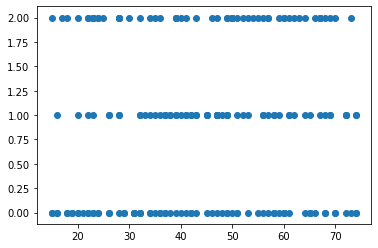

In [142]:
plt.scatter(df[['Age']],df['BP'])

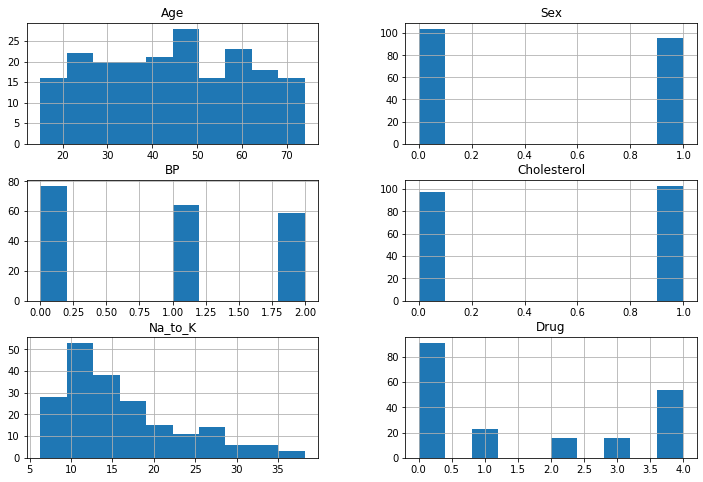

In [143]:
df.hist(figsize=(12,8))
plt.show()

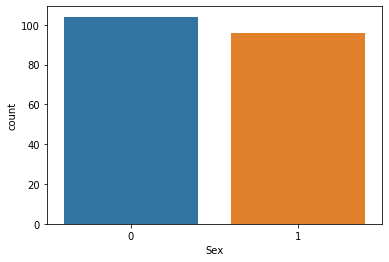

In [145]:
sns.countplot(df['Sex'])

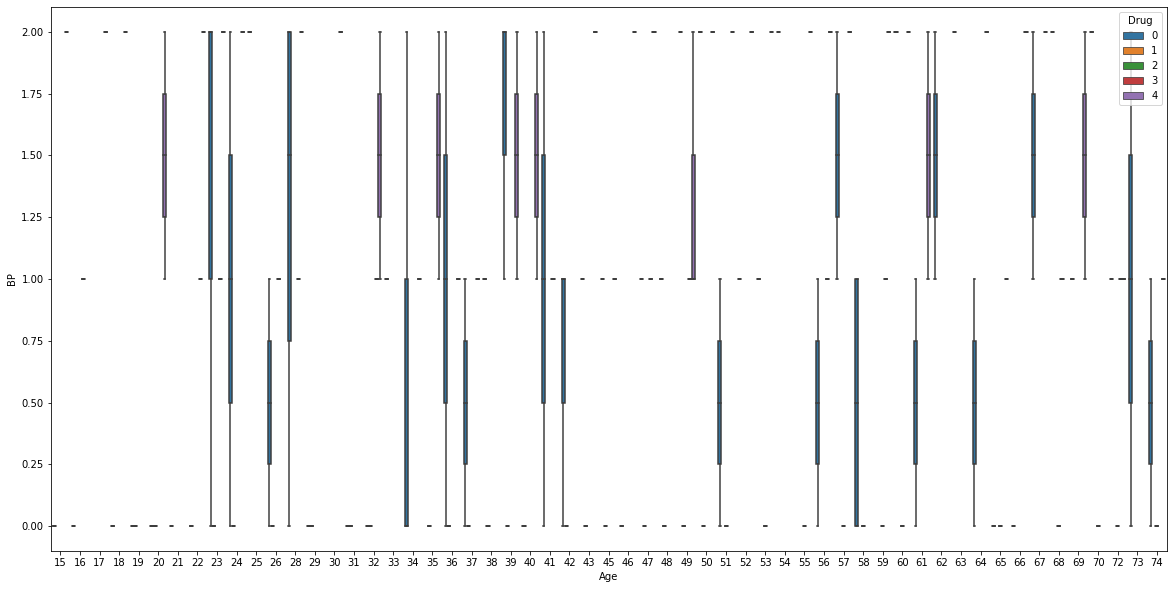

In [149]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Age',y='BP',hue='Drug',data=df)

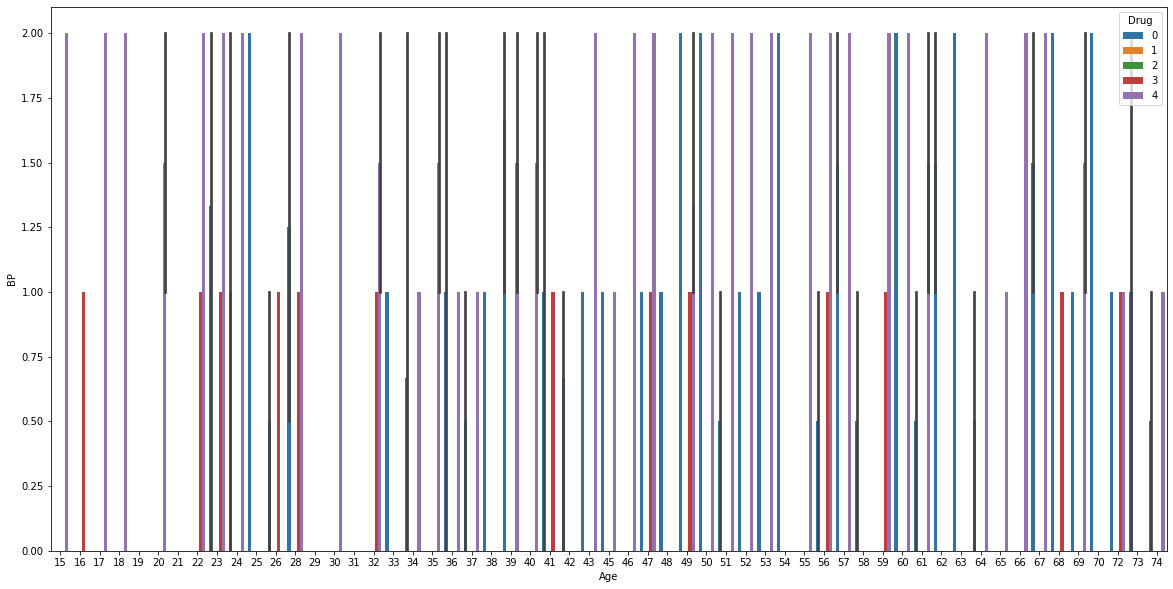

In [151]:
plt.figure(figsize=(20,10))
sns.barplot(x='Age',y='BP',hue='Drug',data=df)

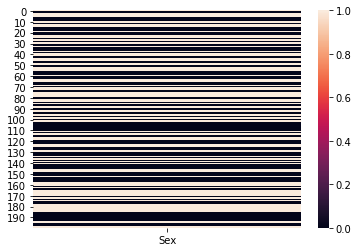

In [152]:
sns.heatmap(df[['Sex']])

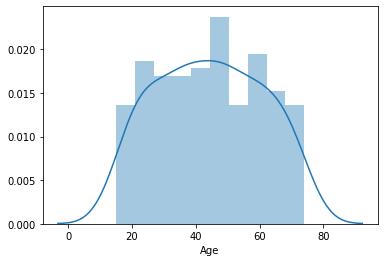

In [154]:
sns.distplot(df['Age'],bins=10)

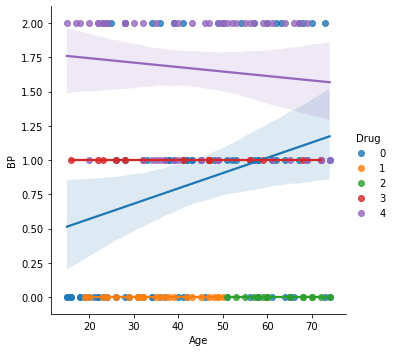

In [155]:
sns.lmplot(x='Age',y='BP',hue='Drug',data=df)

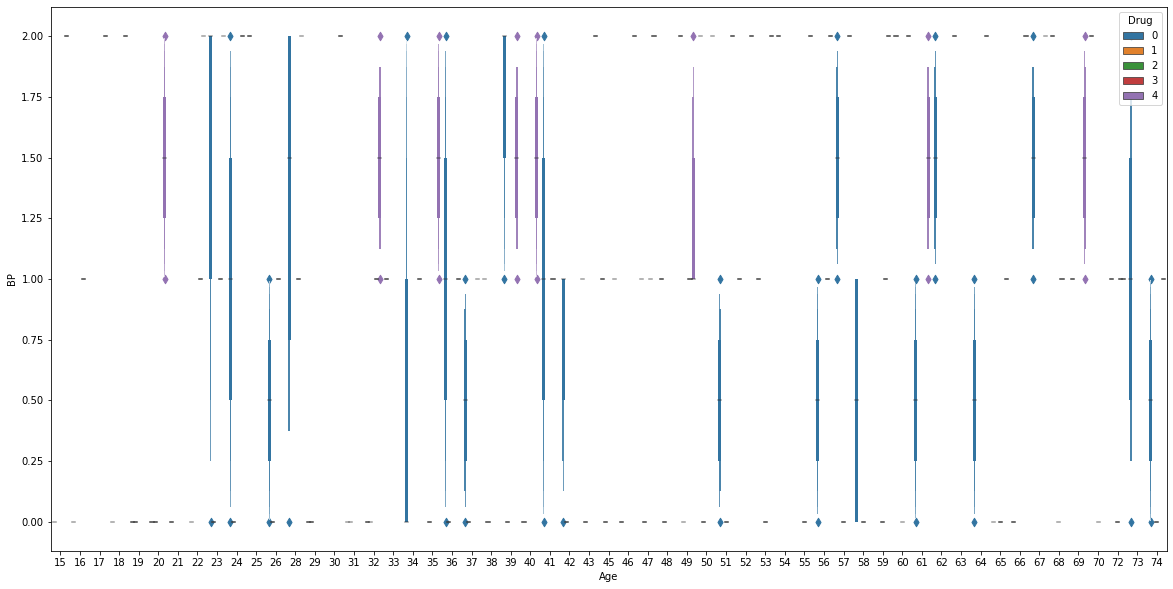

In [176]:
plt.figure(figsize=(20,10))
sns.boxenplot(x='Age',y='BP',hue='Drug',data=df)

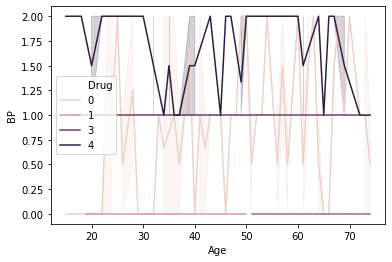

In [157]:
sns.lineplot(x='Age',y='BP',hue='Drug',data=df)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


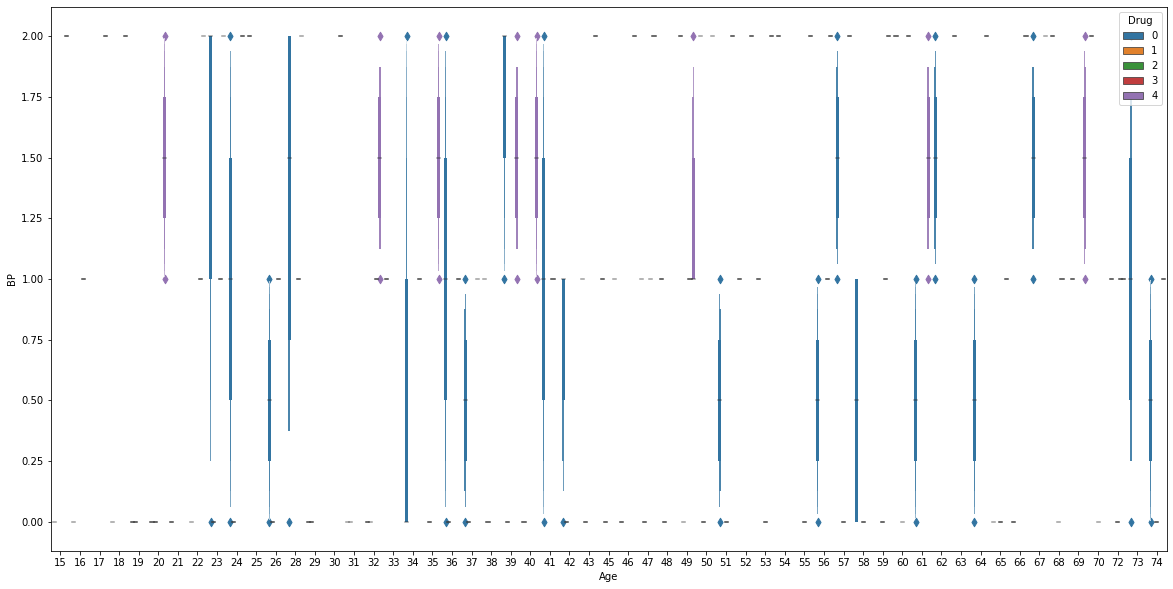

In [177]:
plt.figure(figsize=(20,10))
sns.lvplot(x='Age',y='BP',hue='Drug',data=df)

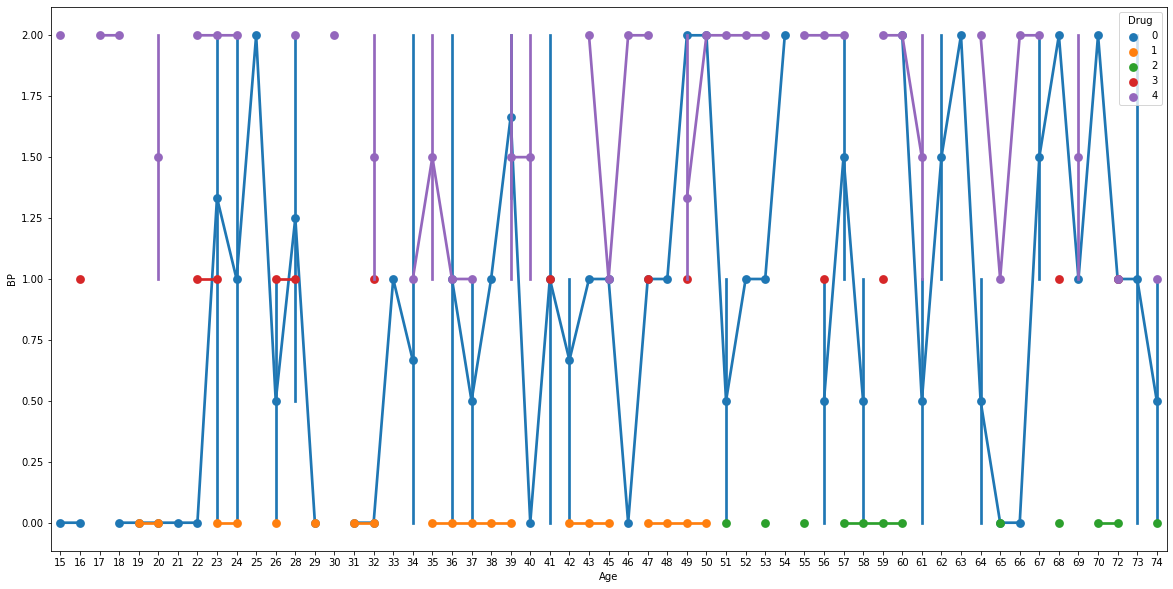

In [178]:
plt.figure(figsize=(20,10))
sns.pointplot(x='Age',y='BP',hue='Drug',data=df)

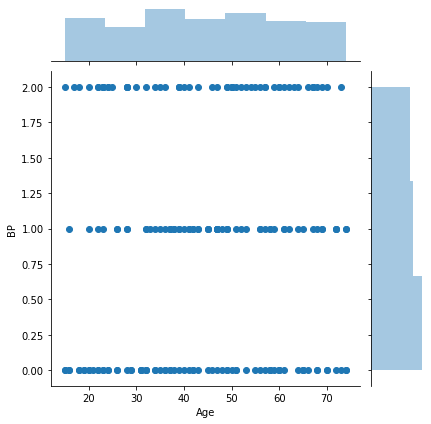

In [162]:
sns.jointplot(x='Age',y='BP',data=df)

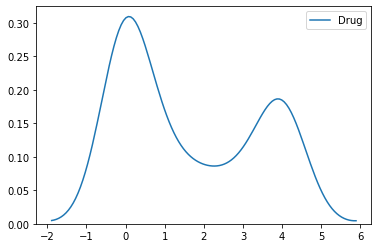

In [167]:
sns.kdeplot(df['Drug'])

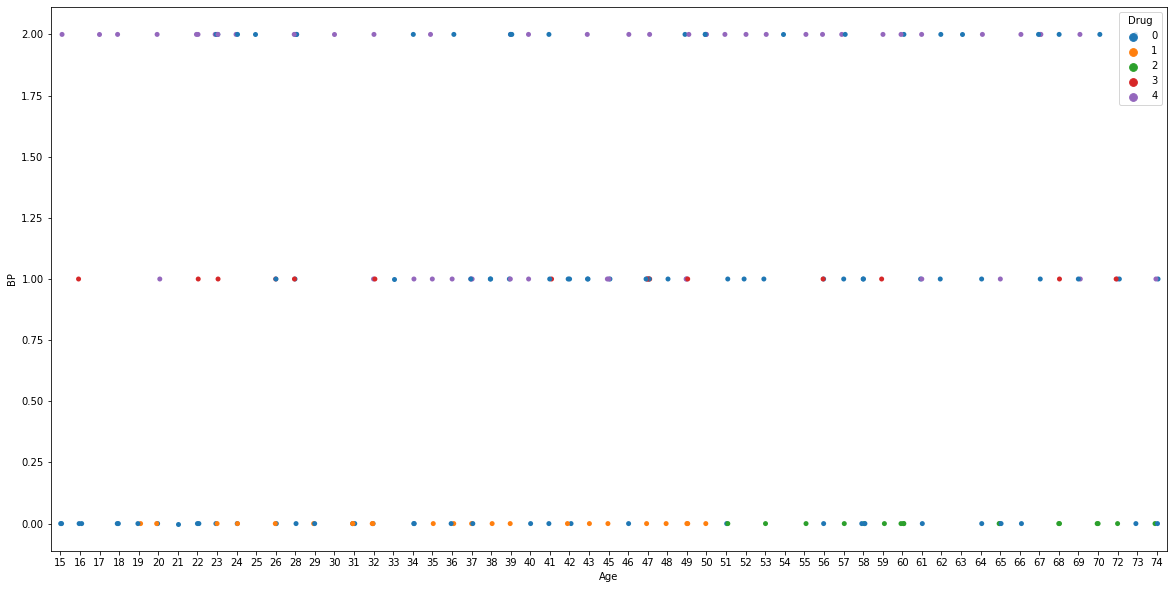

In [179]:
plt.figure(figsize=(20,10))
sns.stripplot(x='Age',y='BP',hue='Drug',data=df)

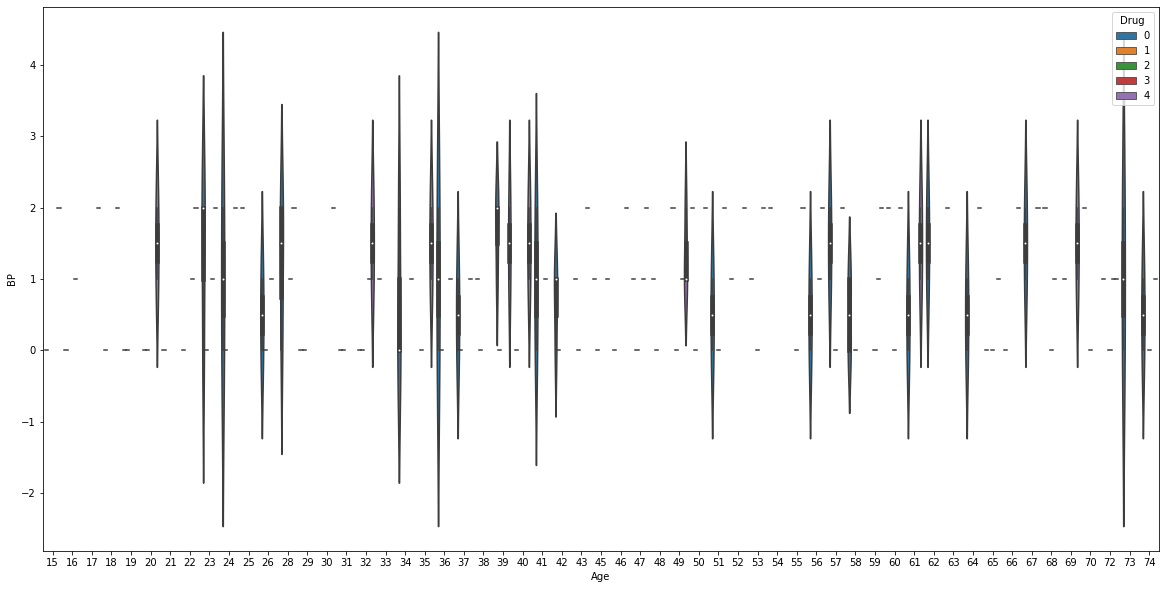

In [180]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Age',y='BP',hue='Drug',data=df)

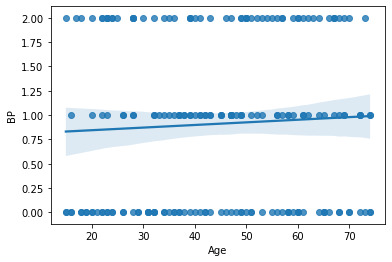

In [172]:
sns.regplot(x='Age',y='BP',data=df)

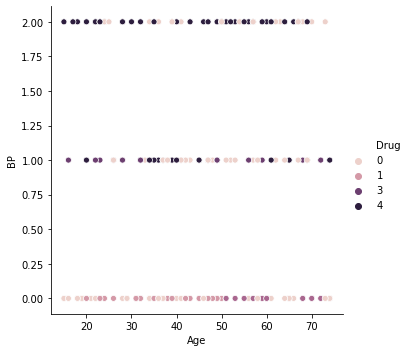

In [173]:
sns.relplot(x='Age',y='BP',hue='Drug',data=df)

In [185]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [189]:
import sweetviz as sv

In [190]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [193]:
from IPython.display import IFrame

In [194]:
IFrame(src='Analyze.html',width=1000,height=600)

In [195]:
from dataprep.eda import *

  0%|          | 0/846 [00:00<?, ?it/s]

DataPrep Report
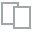
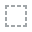
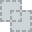
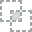
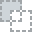
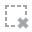
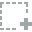
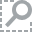
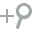
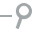
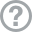
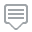
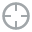
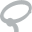
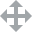
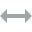
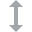
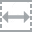
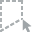
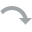
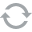
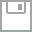
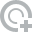
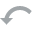
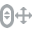
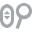
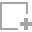
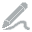
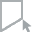
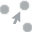
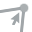
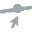

In [196]:
create_report(df)

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
mns=MinMaxScaler()
feat=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
df[feat]=mns.fit_transform(df[feat])
df[feat]

Age  Sex   BP  Cholesterol   Na_to_K  Drug
0    0.135593  1.0  0.0          1.0  0.596848  0.00
1    0.542373  0.0  0.5          1.0  0.213397  0.75
2    0.542373  0.0  0.5          1.0  0.120239  0.75
3    0.220339  1.0  1.0          1.0  0.047814  1.00
4    0.779661  1.0  0.5          1.0  0.368191  0.00
..        ...  ...  ...          ...       ...   ...
195  0.694915  1.0  0.5          1.0  0.165676  0.75
196  0.016949  0.0  0.5          1.0  0.179405  0.75
197  0.627119  0.0  1.0          1.0  0.113359  1.00
198  0.135593  0.0  1.0          0.0  0.242385  1.00
199  0.423729  1.0  0.5          0.0  0.158859  1.00

[200 rows x 6 columns]

In [187]:
from sklearn.preprocessing import StandardScaler

In [188]:
mns=StandardScaler()
feat=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
df[feat]=mns.fit_transform(df[feat])
df[feat]

Age       Sex        BP  Cholesterol   Na_to_K      Drug
0   -1.291591  1.040833 -1.110169     0.970437  1.286522 -0.931654
1    0.162699 -0.960769  0.109797     0.970437 -0.415145  0.820673
2    0.162699 -0.960769  0.109797     0.970437 -0.828558  0.820673
3   -0.988614  1.040833  1.329763     0.970437 -1.149963  1.404782
4    1.011034  1.040833  0.109797     0.970437  0.271794 -0.931654
..        ...       ...       ...          ...       ...       ...
195  0.708057  1.040833  0.109797     0.970437 -0.626917  0.820673
196 -1.715759 -0.960769  0.109797     0.970437 -0.565995  0.820673
197  0.465676 -0.960769  1.329763     0.970437 -0.859089  1.404782
198 -1.291591 -0.960769  1.329763    -1.030464 -0.286500  1.404782
199 -0.261469  1.040833  0.109797    -1.030464 -0.657170  1.404782

[200 rows x 6 columns]